# HMA glacier meltwater runoff analysis

David Shean  
9/23/19

Comparisons of HMA "excess" meltwater runoff estimates from geodetic mass balance observations of Shean et al. (in review), compared to preliminary "total runoff" data from Grogan et al. (in prep) and "total glacier runoff" data from Rounce et al (in review) for each HMA basin.

**Note: these are unpublished results.**

In [1]:
import os
import glob

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
#Default pandas options
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', 500)

In [5]:
#basin_pkl = '/scr/hma/mb_20181211/hma_mb_20181211_2117_rgi60_merge_HMA_aea_join__2000-2018_basin_summary.pkl'
#basin_pkl = '/scr/hma/mb_20190213_nmad_hex/hma_mb_20190214_1015_nmad_rgi60_merge_HMA_aea_join_hex_basin_summary.pkl'
#basin_pkl = '/scr/hma/hma_gmb_data/mb/mb_combined_20190213_nmad/hma_mb_20190214_1015_rgi60_merge_HMA_aea_join_hex_basin_summary.pkl'
basin_pkl = '/scr/hma/hma_gmb_data/mb/mb_20190213_std_sys/hma_mb_20190215_0815_std+mean_rgi60_merge_HMA_aea_hex55_std+mean_mb_combined_splitsigma_join_hex55_basin_summary.pkl'
basin_mb_df = pd.read_pickle(basin_pkl)

In [6]:
basin_mb_df.columns = basin_mb_df.columns.map('_'.join)

In [7]:
basin_mb_df.columns

Index(['mb_Gta_sum_sum', 'mb_Gta_sigma_sum_rss',
       'mb_m3wea_sigma_sum_perc_to_Gta_region',
       'mb_m3wea_sigma_sum_perc_region', 'meltwater_Gta_sum_sum',
       'meltwater_Gta_sigma_sum_rss', 'meltwater_Gta_hex_sum_sum',
       'meltwater_Gta_hex_sigma_sum_rss', 'Area_all_sum_sum', 'ENDO__',
       'basin_area__', 'basin_glac_area_perc__'],
      dtype='object')

In [8]:
basin_mb_df['basin_glac_area_perc__']

basin_name
Amu Darya                        0.89
Indus                            2.11
Syr Darya                        0.18
Ganges                           0.91
Tarim                            2.08
Ili                              0.53
Inner Tibetan Plateau            1.05
Brahmaputra                      1.61
Inner Tibetan Plateau Extended   0.33
Salween                          0.41
Irrawaddy                        0.01
Yellow                           0.02
Mekong                           0.03
Yangtze                          0.10
Name: basin_glac_area_perc__, dtype: float64

In [116]:
basin_mb_df['Area_all_sum_sum']

basin_name
Amu Darya                        10,009.78
Indus                            27,738.26
Syr Darya                         2,055.07
Ganges                            8,584.91
Tarim                            20,466.39
Ili                               4,954.12
Inner Tibetan Plateau             7,152.35
Brahmaputra                      10,232.24
Inner Tibetan Plateau Extended    2,712.91
Salween                           1,164.00
Irrawaddy                            28.44
Yellow                              154.97
Mekong                              215.58
Yangtze                           1,827.66
Name: Area_all_sum_sum, dtype: float64

In [386]:
#Sum of excess meltwater for all glaciers with negative mb
#col = ('meltwater_Gta', 'sum', 'sum')
#sigma_col = ('meltwater_Gta_sigma', 'sum', 'rss')
#Sum of excess meltwater for all hex cells with negative mb
#col = ('meltwater_Gta_hex', 'sum', 'sum')
#sigma_col = ('meltwater_Gta_hex_sigma', 'sum', 'rss')
#Sum of excess meltwater for all basins with negative mb
#col = ('mb_Gta', 'sum', 'sum')
#sigma_col = ('mb_Gta_sigma', 'sum', 'rss')

In [57]:
#Excess meltwater computed from all glaciers (more negative)
col = 'meltwater_Gta_sum_sum'
#sigma_col = 'meltwater_Gta_sigma_sum_rss'
sigma_col = 'mb_m3wea_sigma_sum_perc_to_Gta_region'

In [11]:
#Excess meltwater computed from all hex cells
col = 'meltwater_Gta_hex_sum_sum'
#sigma_col = 'meltwater_Gta_hex_sigma_sum_rss'
sigma_col = 'mb_m3wea_sigma_sum_perc_to_Gta_region'

## WBM runoff

In [58]:
csv_fn='/scr/hma/wbm_discharge/wbm_runoff_20190514/HMA_basin_natural_runoff.csv'
wbm_df = pd.read_csv(csv_fn)

In [59]:
wbm_df.columns

Index(['Basin_ID', 'name', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016'],
      dtype='object')

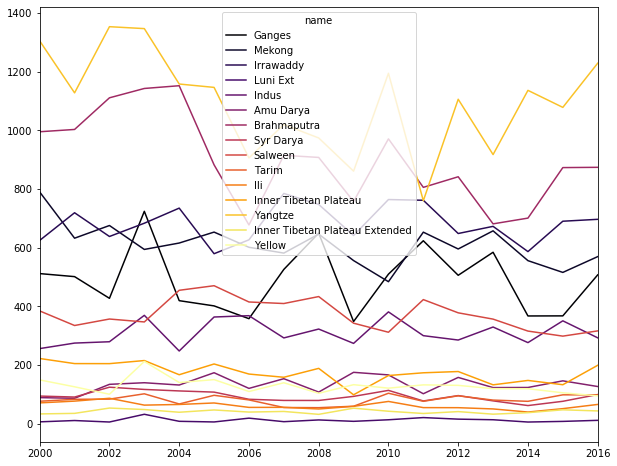

In [60]:
colors = plt.cm.inferno(np.linspace(0, 1, wbm_df.index.size))
wbm_df2 = wbm_df.set_index('name').drop(columns='Basin_ID')
wbm_df2.index = wbm_df2.index.str.replace('_',' ').str.title()
wbm_df2.rename({'Irawaddy':'Irrawaddy'}, inplace=True)
wbm_df2 = wbm_df2.T
wbm_df2.index = wbm_df2.index.astype('int', copy=False)
wbm_df2 = wbm_df2.loc[2000:]
wbm_df2.plot(figsize=(10,8), color=colors)

In [61]:
basin_mb_df.index.sort_values()

Index(['Amu Darya', 'Brahmaputra', 'Ganges', 'Ili', 'Indus',
       'Inner Tibetan Plateau', 'Inner Tibetan Plateau Extended', 'Irrawaddy',
       'Mekong', 'Salween', 'Syr Darya', 'Tarim', 'Yangtze', 'Yellow'],
      dtype='object', name='basin_name')

In [62]:
wbm_df2.columns.sort_values()

Index(['Amu Darya', 'Brahmaputra', 'Ganges', 'Ili', 'Indus',
       'Inner Tibetan Plateau', 'Inner Tibetan Plateau Extended', 'Irrawaddy',
       'Luni Ext', 'Mekong', 'Salween', 'Syr Darya', 'Tarim', 'Yangtze',
       'Yellow'],
      dtype='object', name='name')

In [63]:
wbm_stats = wbm_df2.describe().T.sort_values('mean',ascending=False)

In [64]:
wbm_stats.columns = 'wbm_'+wbm_stats.columns

In [65]:
wbm_stats

,wbm_count,wbm_mean,wbm_std,wbm_min,wbm_25%,wbm_50%,wbm_75%,wbm_max
name,,,,,,,,
Yangtze,17.00,"1,094.81",170.65,759.85,973.63,"1,127.32","1,194.04","1,352.80"
Brahmaputra,17.00,899.13,150.63,677.25,805.34,882.04,994.83,"1,151.67"
Irrawaddy,17.00,682.15,62.76,579.25,637.94,683.15,734.59,784.55
Mekong,17.00,610.19,69.79,483.90,569.33,601.13,652.68,789.48
Ganges,17.00,489.99,110.09,348.17,401.44,505.72,525.72,723.71
Salween,17.00,373.31,52.99,298.42,334.63,356.70,414.78,470.20
Indus,17.00,309.55,43.12,247.78,276.32,292.64,350.57,381.02
Inner Tibetan Plateau,17.00,174.08,33.43,98.56,158.24,173.50,203.53,222.22
Amu Darya,17.00,132.76,27.21,86.68,120.33,131.83,153.34,175.08


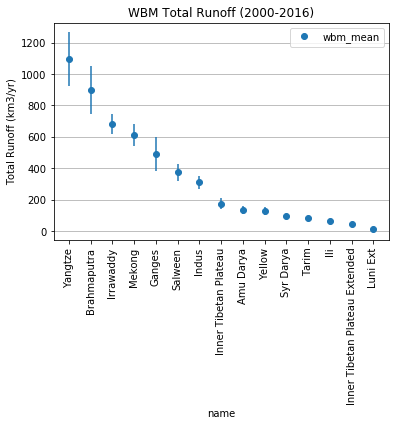

In [66]:
#wbm_df2.mean(axis=0).sort_values(ascending=False).plot(marker='o', ls='none', figsize=(10,8))
ax = wbm_stats.plot(y='wbm_mean',yerr='wbm_std',ls='none',marker='o')
ax.set_ylabel('Total Runoff (km3/yr)')
ax.set_title('WBM Total Runoff (2000-2016)')
xticks = plt.xticks(np.arange(wbm_stats.shape[0]), wbm_stats.index, rotation=90)
plt.autoscale()
ax.grid(axis='y')
#plt.xticks(rotation='vertical')
out_fn = os.path.splitext(csv_fn)[0]+'_totalrunoff.png'
plt.savefig(out_fn, dpi=300, bbox_inches='tight', pad_inches=0)

In [67]:
wbm_stats.sum()

wbm_count     255.00
wbm_mean    5,184.37
wbm_std       806.79
wbm_min     3,868.68
wbm_25%     4,639.16
wbm_50%     5,165.28
wbm_75%     5,699.05
wbm_max     6,663.19
dtype: float64

## Huss and Hock (2018) Qbasin values

In [68]:
husshock_fn = '/scr/hma/hma_gmb_data/rounce_runoff/huss_hock_runoff.txt'
husshock_df = pd.read_csv(husshock_fn, delimiter=' ')
husshock_df['Basin'] = husshock_df['Basin'].str.title()
husshock_df.set_index('Basin', inplace=True)
husshock_df

,Station,Nat.,Period,QJune,QJuly,QAug,QSept
Basin,,,,,,,
Indus,KOTRI,PK,1936-1979,3623,6552,10724,6073
Tarim,WBM,NaN,1986-1995,6154,4102,3184,1732
Brahmaputra,BAHADURABAD,BD,1969-1992,32398,49111,45017,43805
Aralsea,CHATLY,UZ,1936-1973,2978,3548,2958,1911
Ganges,FARAKKA,IN,1949-1973,4314,20793,43030,36899
Balkhash,USH-TOBE,KZ,1965-1985,1553,1246,742,842
Yangtze,DATONG,CN,1922-1988,40170,48818,44315,41806
Salween,WBM,NaN,1986-1995,1706,5355,8252,7645
Issyk-Kul,UST.DJUMGOL,KG,1933-1980,2677,2180,1246,767


In [69]:
spy = 365.25*24*60*60

In [70]:
husshock_df['QJune-Sept'] = husshock_df[['QJune','QJuly','QAug','QSept']].sum(axis=1)
husshock_df

,Station,Nat.,Period,QJune,QJuly,QAug,QSept,QJune-Sept
Basin,,,,,,,,
Indus,KOTRI,PK,1936-1979,3623,6552,10724,6073,26972
Tarim,WBM,NaN,1986-1995,6154,4102,3184,1732,15172
Brahmaputra,BAHADURABAD,BD,1969-1992,32398,49111,45017,43805,170331
Aralsea,CHATLY,UZ,1936-1973,2978,3548,2958,1911,11395
Ganges,FARAKKA,IN,1949-1973,4314,20793,43030,36899,105036
Balkhash,USH-TOBE,KZ,1965-1985,1553,1246,742,842,4383
Yangtze,DATONG,CN,1922-1988,40170,48818,44315,41806,175109
Salween,WBM,NaN,1986-1995,1706,5355,8252,7645,22958
Issyk-Kul,UST.DJUMGOL,KG,1933-1980,2677,2180,1246,767,6870


In [71]:
husshock_df['QJune-Sept_Gta'] = husshock_df['QJune-Sept']*spy/1E9
husshock_df

,Station,Nat.,Period,QJune,QJuly,QAug,QSept,QJune-Sept,QJune-Sept_Gta
Basin,,,,,,,,,
Indus,KOTRI,PK,1936-1979,3623,6552,10724,6073,26972,851.17
Tarim,WBM,NaN,1986-1995,6154,4102,3184,1732,15172,478.79
Brahmaputra,BAHADURABAD,BD,1969-1992,32398,49111,45017,43805,170331,"5,375.24"
Aralsea,CHATLY,UZ,1936-1973,2978,3548,2958,1911,11395,359.60
Ganges,FARAKKA,IN,1949-1973,4314,20793,43030,36899,105036,"3,314.68"
Balkhash,USH-TOBE,KZ,1965-1985,1553,1246,742,842,4383,138.32
Yangtze,DATONG,CN,1922-1988,40170,48818,44315,41806,175109,"5,526.02"
Salween,WBM,NaN,1986-1995,1706,5355,8252,7645,22958,724.50
Issyk-Kul,UST.DJUMGOL,KG,1933-1980,2677,2180,1246,767,6870,216.80


Text(0.5, 1.0, 'Huss and Hock (2018) Suppl. Table 6')

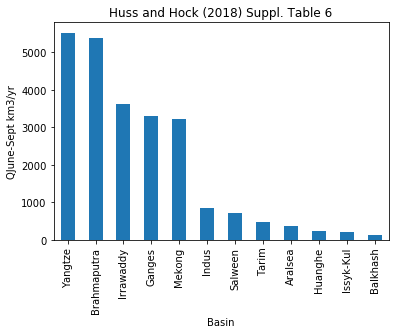

In [72]:
ax = husshock_df['QJune-Sept_Gta'].sort_values(ascending=False).plot.bar()
ax.set_ylabel('QJune-Sept km3/yr')
ax.set_title('Huss and Hock (2018) Suppl. Table 6')

In [73]:
basin_mb_df

,mb_Gta_sum_sum,mb_Gta_sigma_sum_rss,mb_m3wea_sigma_sum_perc_to_Gta_region,mb_m3wea_sigma_sum_perc_region,meltwater_Gta_sum_sum,meltwater_Gta_sigma_sum_rss,meltwater_Gta_hex_sum_sum,meltwater_Gta_hex_sigma_sum_rss,Area_all_sum_sum,ENDO__,basin_area__,basin_glac_area_perc__
basin_name,,,,,,,,,,,,
Amu Darya,-0.97,0.33,0.38,0.23,-1.32,0.22,-1.04,0.30,"10,009.78",1,"1,123,674.15",0.89
Indus,-3.53,0.71,0.97,0.17,-4.55,0.53,-3.92,0.61,"27,738.26",0,"1,316,074.68",2.11
Syr Darya,-0.34,0.13,0.15,0.29,-0.43,0.10,-0.35,0.13,"2,055.07",1,"1,113,237.95",0.18
Ganges,-3.19,0.43,0.58,0.18,-3.26,0.40,-3.19,0.43,"8,584.91",0,"946,058.08",0.91
Tarim,-0.87,0.54,0.71,0.18,-2.40,0.39,-1.85,0.47,"20,466.39",1,"983,017.40",2.08
Ili,-1.94,0.41,0.48,0.23,-2.00,0.38,-1.94,0.41,"4,954.12",1,"941,437.06",0.53
Inner Tibetan Plateau,-0.91,0.24,0.29,0.22,-1.12,0.19,-1.00,0.24,"7,152.35",1,"681,981.08",1.05
Brahmaputra,-4.87,0.77,1.01,0.18,-5.23,0.62,-4.87,0.77,"10,232.24",0,"635,083.43",1.61
Inner Tibetan Plateau Extended,-0.66,0.20,0.21,0.29,-0.70,0.18,-0.67,0.20,"2,712.91",1,"822,869.13",0.33


In [74]:
#basin_df = basin_mb_df.join(wbm_df2.mean(axis=0).rename('wbm_mean'), how='inner')
#basin_df = basin_mb_df.join(wbm_df2.loc[2000:].mean(axis=0).rename('wbm_mean'), how='inner')
basin_df = basin_mb_df.join(wbm_stats, how='inner')
basin_df.columns

Index(['mb_Gta_sum_sum', 'mb_Gta_sigma_sum_rss',
       'mb_m3wea_sigma_sum_perc_to_Gta_region',
       'mb_m3wea_sigma_sum_perc_region', 'meltwater_Gta_sum_sum',
       'meltwater_Gta_sigma_sum_rss', 'meltwater_Gta_hex_sum_sum',
       'meltwater_Gta_hex_sigma_sum_rss', 'Area_all_sum_sum', 'ENDO__',
       'basin_area__', 'basin_glac_area_perc__', 'wbm_count', 'wbm_mean',
       'wbm_std', 'wbm_min', 'wbm_25%', 'wbm_50%', 'wbm_75%', 'wbm_max'],
      dtype='object')

In [75]:
basin_df[col+'_wbm_perc_err'] = ((basin_df[sigma_col]/basin_df[col])**2 + \
                         (basin_df['wbm_std']/basin_df['wbm_mean'])**2)**0.5

In [76]:
basin_df[col+'_wbm_perc_err']

Amu Darya                        0.35
Indus                            0.26
Syr Darya                        0.39
Ganges                           0.29
Tarim                            0.36
Ili                              0.31
Inner Tibetan Plateau            0.32
Brahmaputra                      0.26
Inner Tibetan Plateau Extended   0.35
Salween                          0.26
Irrawaddy                        0.72
Yellow                           0.61
Mekong                           0.30
Yangtze                          0.27
Name: meltwater_Gta_sum_sum_wbm_perc_err, dtype: float64

In [77]:
#spy = 31557600
#basin_df['meltwater_m3s'] = 1E9*basin_df[('meltwater', 'total_Gta')]/spy
#basin_df['meltwater_perc'] = abs(100*basin_df[('meltwater', 'total_Gta')]/basin_df['mean'])
#basin_df['meltwater_perc_err'] = abs(100*basin_df[('meltwater', 'total_Gta')]/basin_df['mean'])
#basin_df['meltwater_perc_err'] = abs(100*basin_df[('meltwater_Gta_sigma', 'sum', 'rss')]/basin_df['mean'])
#basin_df[col+'_wbm_perc_err'] = basin_df['total_err']

basin_df[col+'_wbm_perc'] = abs(100*basin_df[col]/basin_df['wbm_mean'])
basin_df[col+'_wbm_perc_total_err'] = basin_df[col+'_wbm_perc_err'] * basin_df[col+'_wbm_perc']

In [78]:
basin_df[[col+'_wbm_perc', col+'_wbm_perc_err', col+'_wbm_perc_total_err']]

,meltwater_Gta_sum_sum_wbm_perc,meltwater_Gta_sum_sum_wbm_perc_err,meltwater_Gta_sum_sum_wbm_perc_total_err
Amu Darya,0.99,0.35,0.35
Indus,1.47,0.26,0.37
Syr Darya,0.46,0.39,0.18
Ganges,0.67,0.29,0.19
Tarim,2.94,0.36,1.05
Ili,3.25,0.31,1.00
Inner Tibetan Plateau,0.64,0.32,0.21
Brahmaputra,0.58,0.26,0.15
Inner Tibetan Plateau Extended,1.69,0.35,0.59
Salween,0.20,0.26,0.05


In [79]:
basin_df

,mb_Gta_sum_sum,mb_Gta_sigma_sum_rss,mb_m3wea_sigma_sum_perc_to_Gta_region,mb_m3wea_sigma_sum_perc_region,meltwater_Gta_sum_sum,meltwater_Gta_sigma_sum_rss,meltwater_Gta_hex_sum_sum,meltwater_Gta_hex_sigma_sum_rss,Area_all_sum_sum,ENDO__,basin_area__,basin_glac_area_perc__,wbm_count,wbm_mean,wbm_std,wbm_min,wbm_25%,wbm_50%,wbm_75%,wbm_max,meltwater_Gta_sum_sum_wbm_perc_err,meltwater_Gta_sum_sum_wbm_perc,meltwater_Gta_sum_sum_wbm_perc_total_err
Amu Darya,-0.97,0.33,0.38,0.23,-1.32,0.22,-1.04,0.30,"10,009.78",1,"1,123,674.15",0.89,17.00,132.76,27.21,86.68,120.33,131.83,153.34,175.08,0.35,0.99,0.35
Indus,-3.53,0.71,0.97,0.17,-4.55,0.53,-3.92,0.61,"27,738.26",0,"1,316,074.68",2.11,17.00,309.55,43.12,247.78,276.32,292.64,350.57,381.02,0.26,1.47,0.37
Syr Darya,-0.34,0.13,0.15,0.29,-0.43,0.10,-0.35,0.13,"2,055.07",1,"1,113,237.95",0.18,17.00,93.11,17.29,61.84,79.20,93.15,107.66,124.41,0.39,0.46,0.18
Ganges,-3.19,0.43,0.58,0.18,-3.26,0.40,-3.19,0.43,"8,584.91",0,"946,058.08",0.91,17.00,489.99,110.09,348.17,401.44,505.72,525.72,723.71,0.29,0.67,0.19
Tarim,-0.87,0.54,0.71,0.18,-2.40,0.39,-1.85,0.47,"20,466.39",1,"983,017.40",2.08,17.00,81.68,15.98,54.64,76.31,81.05,96.79,103.82,0.36,2.94,1.05
Ili,-1.94,0.41,0.48,0.23,-2.00,0.38,-1.94,0.41,"4,954.12",1,"941,437.06",0.53,17.00,61.61,11.94,39.76,54.61,59.18,70.65,86.67,0.31,3.25,1.00
Inner Tibetan Plateau,-0.91,0.24,0.29,0.22,-1.12,0.19,-1.00,0.24,"7,152.35",1,"681,981.08",1.05,17.00,174.08,33.43,98.56,158.24,173.50,203.53,222.22,0.32,0.64,0.21
Brahmaputra,-4.87,0.77,1.01,0.18,-5.23,0.62,-4.87,0.77,"10,232.24",0,"635,083.43",1.61,17.00,899.13,150.63,677.25,805.34,882.04,994.83,"1,151.67",0.26,0.58,0.15
Inner Tibetan Plateau Extended,-0.66,0.20,0.21,0.29,-0.70,0.18,-0.67,0.20,"2,712.91",1,"822,869.13",0.33,17.00,41.30,6.78,31.92,35.22,41.27,46.88,53.36,0.35,1.69,0.59
Salween,-0.74,0.14,0.16,0.22,-0.75,0.14,-0.74,0.14,"1,164.00",0,"280,908.50",0.41,17.00,373.31,52.99,298.42,334.63,356.70,414.78,470.20,0.26,0.20,0.05


In [80]:
#Sort by glacier area
##basin_df.sort_values(by=('Area_all', 'sum'))
#basin_df.sort_values(by='mean', ascending=False, inplace=True)
##basin_df.sort_values(by=('meltwater_Gta', 'sum', 'sum'))

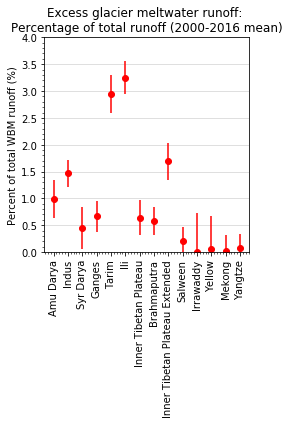

In [81]:
#basin_df = basin_df.dropna(axis=0, how='any')
f,ax = plt.subplots(sharex=False, figsize=(4,6))
plt.xticks(rotation=90)
plt.minorticks_on()
ax.tick_params(axis='x',which='minor',bottom='off')
ax.set_title("Excess glacier meltwater runoff: \nPercentage of total runoff (2000-2016 mean)")
#ax.plot(basin_df.index, basin_df['meltwater_perc'], ls='none', marker='o', color='r')
ax.errorbar(basin_df.index, basin_df[col+'_wbm_perc'], yerr=basin_df[col+'_wbm_perc_err'], ls='none', marker='o', color='r')
#ax.bar(basin_df.index, basin_df['meltwater_perc'])
#ax.set_xlabel("Basin")
ax.set_ylabel("Percent of total WBM runoff (%)")
ax.set_ylim(0, 4)
#ax.set_xticks(range(len(basin_df.index)))
#ax.set_xticklabels(basin_df.index)
#ax.legend(title='Forcing')
ax.yaxis.grid(alpha=0.5)
plt.tight_layout()
out_fn = os.path.splitext(csv_fn)[0]+'_percentQ.png'
plt.savefig(out_fn, dpi=300)

## Rounce Total Glacier runoff
Mean annual runoff [Gt/yr] 2000 - 2017 (water years) from ERA-Interim

In [82]:
#totalrunoff_csv_fn = '/scr/hma/hma_gmb_data/rounce_runoff/watershed_eraint_runoff.csv'
totalrunoff_csv_fn = '/scr/hma/hma_gmb_data/rounce_runoff/watershed_eraint_2000-2018_runoff.csv'

In [83]:
totalrunoff_df = pd.read_csv(totalrunoff_csv_fn)
totalrunoff_df.set_index('watershed', inplace=True)
totalrunoff_df.index = totalrunoff_df.index.str.replace('_',' ')
totalrunoff_df.index = totalrunoff_df.index.str.title()

In [84]:
totalrunoff_df

,runoff_gta,runoff_interannual_std_gta,runoff_interannual_std_pc,std_corr_gta,std_uncorr_gta,std_corr_perfect_gta,std_corr_perfect_pc,melt_gta,melt_interannual_std_gta,excess_meltwater_gta,excess_meltwater_interannual_std_gta,rfrz_gta,rfrz_interannual_std_gta
watershed,,,,,,,,,,,,,
Amu Darya,13.98,2.40,17.17,1.01,0.51,6.60,7.20,10.70,2.15,1.37,1.12,0.47,0.11
Brahmaputra,45.43,3.49,7.68,1.89,0.86,17.21,4.15,22.81,1.95,5.81,2.33,0.27,0.07
Ganges,23.12,1.93,8.34,1.46,0.73,10.94,6.31,11.24,0.98,3.15,1.38,0.28,0.07
Ili,4.90,0.94,19.13,0.64,0.34,2.40,12.97,3.81,0.77,1.53,0.54,0.19,0.05
Indus,30.89,5.24,16.98,1.48,0.77,14.61,4.79,25.41,4.26,4.76,2.66,1.19,0.31
Inner Tibetan Plateau,4.02,0.99,24.50,0.35,0.21,1.77,8.62,2.79,0.83,0.87,0.65,0.26,0.07
Inner Tibetan Plateau Extended,2.39,0.95,39.59,0.18,0.11,1.02,7.40,2.00,0.81,0.65,0.62,0.17,0.04
Irrawaddy,0.26,0.03,11.23,0.10,0.05,0.12,40.27,0.10,0.02,0.03,0.01,0.00,0.00
Mekong,0.52,0.07,12.62,0.10,0.05,0.20,19.51,0.28,0.05,0.09,0.06,0.01,0.00


In [85]:
totalrunoff_df.columns = 'pygem_'+totalrunoff_df.columns

In [86]:
totalrunoff_df.columns

Index(['pygem_runoff_gta', 'pygem_runoff_interannual_std_gta',
       'pygem_runoff_interannual_std_pc', 'pygem_std_corr_gta',
       'pygem_std_uncorr_gta', 'pygem_std_corr_perfect_gta',
       'pygem_std_corr_perfect_pc', 'pygem_melt_gta',
       'pygem_melt_interannual_std_gta', 'pygem_excess_meltwater_gta',
       'pygem_excess_meltwater_interannual_std_gta', 'pygem_rfrz_gta',
       'pygem_rfrz_interannual_std_gta'],
      dtype='object')

In [87]:
totalrunoff_df['pygem_balance_melt_gta'] = totalrunoff_df['pygem_melt_gta'] - totalrunoff_df['pygem_excess_meltwater_gta']
totalrunoff_df['pygem_balance_melt_interannual_std_gta'] = (totalrunoff_df['pygem_melt_interannual_std_gta']**2 + totalrunoff_df['pygem_excess_meltwater_interannual_std_gta']**2)**0.5

In [88]:
basin_df_merge = basin_df.merge(totalrunoff_df, left_index=True, right_index=True)

In [89]:
basin_df_merge.columns

Index(['mb_Gta_sum_sum', 'mb_Gta_sigma_sum_rss',
       'mb_m3wea_sigma_sum_perc_to_Gta_region',
       'mb_m3wea_sigma_sum_perc_region', 'meltwater_Gta_sum_sum',
       'meltwater_Gta_sigma_sum_rss', 'meltwater_Gta_hex_sum_sum',
       'meltwater_Gta_hex_sigma_sum_rss', 'Area_all_sum_sum', 'ENDO__',
       'basin_area__', 'basin_glac_area_perc__', 'wbm_count', 'wbm_mean',
       'wbm_std', 'wbm_min', 'wbm_25%', 'wbm_50%', 'wbm_75%', 'wbm_max',
       'meltwater_Gta_sum_sum_wbm_perc_err', 'meltwater_Gta_sum_sum_wbm_perc',
       'meltwater_Gta_sum_sum_wbm_perc_total_err', 'pygem_runoff_gta',
       'pygem_runoff_interannual_std_gta', 'pygem_runoff_interannual_std_pc',
       'pygem_std_corr_gta', 'pygem_std_uncorr_gta',
       'pygem_std_corr_perfect_gta', 'pygem_std_corr_perfect_pc',
       'pygem_melt_gta', 'pygem_melt_interannual_std_gta',
       'pygem_excess_meltwater_gta',
       'pygem_excess_meltwater_interannual_std_gta', 'pygem_rfrz_gta',
       'pygem_rfrz_interannual_std_gt

In [90]:
basin_df_merge

,mb_Gta_sum_sum,mb_Gta_sigma_sum_rss,mb_m3wea_sigma_sum_perc_to_Gta_region,mb_m3wea_sigma_sum_perc_region,meltwater_Gta_sum_sum,meltwater_Gta_sigma_sum_rss,meltwater_Gta_hex_sum_sum,meltwater_Gta_hex_sigma_sum_rss,Area_all_sum_sum,ENDO__,basin_area__,basin_glac_area_perc__,wbm_count,wbm_mean,wbm_std,wbm_min,wbm_25%,wbm_50%,wbm_75%,wbm_max,meltwater_Gta_sum_sum_wbm_perc_err,meltwater_Gta_sum_sum_wbm_perc,meltwater_Gta_sum_sum_wbm_perc_total_err,pygem_runoff_gta,pygem_runoff_interannual_std_gta,pygem_runoff_interannual_std_pc,pygem_std_corr_gta,pygem_std_uncorr_gta,pygem_std_corr_perfect_gta,pygem_std_corr_perfect_pc,pygem_melt_gta,pygem_melt_interannual_std_gta,pygem_excess_meltwater_gta,pygem_excess_meltwater_interannual_std_gta,pygem_rfrz_gta,pygem_rfrz_interannual_std_gta,pygem_balance_melt_gta,pygem_balance_melt_interannual_std_gta
Amu Darya,-0.97,0.33,0.38,0.23,-1.32,0.22,-1.04,0.30,"10,009.78",1,"1,123,674.15",0.89,17.00,132.76,27.21,86.68,120.33,131.83,153.34,175.08,0.35,0.99,0.35,13.98,2.40,17.17,1.01,0.51,6.60,7.20,10.70,2.15,1.37,1.12,0.47,0.11,9.33,2.42
Indus,-3.53,0.71,0.97,0.17,-4.55,0.53,-3.92,0.61,"27,738.26",0,"1,316,074.68",2.11,17.00,309.55,43.12,247.78,276.32,292.64,350.57,381.02,0.26,1.47,0.37,30.89,5.24,16.98,1.48,0.77,14.61,4.79,25.41,4.26,4.76,2.66,1.19,0.31,20.66,5.03
Syr Darya,-0.34,0.13,0.15,0.29,-0.43,0.10,-0.35,0.13,"2,055.07",1,"1,113,237.95",0.18,17.00,93.11,17.29,61.84,79.20,93.15,107.66,124.41,0.39,0.46,0.18,3.92,0.58,14.80,0.49,0.25,1.72,12.56,2.59,0.48,0.53,0.28,0.10,0.02,2.06,0.55
Ganges,-3.19,0.43,0.58,0.18,-3.26,0.40,-3.19,0.43,"8,584.91",0,"946,058.08",0.91,17.00,489.99,110.09,348.17,401.44,505.72,525.72,723.71,0.29,0.67,0.19,23.12,1.93,8.34,1.46,0.73,10.94,6.31,11.24,0.98,3.15,1.38,0.28,0.07,8.08,1.69
Tarim,-0.87,0.54,0.71,0.18,-2.40,0.39,-1.85,0.47,"20,466.39",1,"983,017.40",2.08,17.00,81.68,15.98,54.64,76.31,81.05,96.79,103.82,0.36,2.94,1.05,11.00,2.34,21.28,0.87,0.47,6.41,7.87,9.31,2.10,2.00,0.95,0.75,0.25,7.31,2.31
Ili,-1.94,0.41,0.48,0.23,-2.00,0.38,-1.94,0.41,"4,954.12",1,"941,437.06",0.53,17.00,61.61,11.94,39.76,54.61,59.18,70.65,86.67,0.31,3.25,1.00,4.90,0.94,19.13,0.64,0.34,2.40,12.97,3.81,0.77,1.53,0.54,0.19,0.05,2.29,0.94
Inner Tibetan Plateau,-0.91,0.24,0.29,0.22,-1.12,0.19,-1.00,0.24,"7,152.35",1,"681,981.08",1.05,17.00,174.08,33.43,98.56,158.24,173.50,203.53,222.22,0.32,0.64,0.21,4.02,0.99,24.50,0.35,0.21,1.77,8.62,2.79,0.83,0.87,0.65,0.26,0.07,1.92,1.06
Brahmaputra,-4.87,0.77,1.01,0.18,-5.23,0.62,-4.87,0.77,"10,232.24",0,"635,083.43",1.61,17.00,899.13,150.63,677.25,805.34,882.04,994.83,"1,151.67",0.26,0.58,0.15,45.43,3.49,7.68,1.89,0.86,17.21,4.15,22.81,1.95,5.81,2.33,0.27,0.07,17.01,3.04
Inner Tibetan Plateau Extended,-0.66,0.20,0.21,0.29,-0.70,0.18,-0.67,0.20,"2,712.91",1,"822,869.13",0.33,17.00,41.30,6.78,31.92,35.22,41.27,46.88,53.36,0.35,1.69,0.59,2.39,0.95,39.59,0.18,0.11,1.02,7.40,2.00,0.81,0.65,0.62,0.17,0.04,1.34,1.02
Salween,-0.74,0.14,0.16,0.22,-0.75,0.14,-0.74,0.14,"1,164.00",0,"280,908.50",0.41,17.00,373.31,52.99,298.42,334.63,356.70,414.78,470.20,0.26,0.20,0.05,4.04,0.38,9.42,0.79,0.36,1.36,19.66,2.03,0.25,0.61,0.24,0.03,0.01,1.42,0.35


In [91]:
#basin_df.index = basin_df.index.str.replace('_',' ')

In [92]:
endo_idx = basin_df_merge['ENDO__'] == 1
#basin_df_merge_endo = basin_df_merge[endo_idx]
#basin_df_merge_exo = basin_df_merge[~endo_idx]

In [112]:
widthcol = 'basin_glac_area_perc__'
width = 1.0*basin_df_merge[widthcol]/basin_df_merge[widthcol].max()
width

Amu Darya                        0.42
Indus                            1.00
Syr Darya                        0.09
Ganges                           0.43
Tarim                            0.99
Ili                              0.25
Inner Tibetan Plateau            0.50
Brahmaputra                      0.76
Inner Tibetan Plateau Extended   0.16
Salween                          0.20
Irrawaddy                        0.00
Yellow                           0.01
Mekong                           0.01
Yangtze                          0.05
Name: basin_glac_area_perc__, dtype: float64

In [113]:
basin_df_merge[widthcol]

Amu Darya                        0.89
Indus                            2.11
Syr Darya                        0.18
Ganges                           0.91
Tarim                            2.08
Ili                              0.53
Inner Tibetan Plateau            1.05
Brahmaputra                      1.61
Inner Tibetan Plateau Extended   0.33
Salween                          0.41
Irrawaddy                        0.01
Yellow                           0.02
Mekong                           0.03
Yangtze                          0.10
Name: basin_glac_area_perc__, dtype: float64

In [108]:
def make_fig(col=col, pygem_col=''):
    f,ax = plt.subplots(figsize=(4,6))
    plt.xticks(rotation=90)
    plt.minorticks_on()
    ax.tick_params(axis='x',which='minor',bottom='off')
    #ax.set_title("Excess glacier meltwater runoff: \n% of PyGEM glacier runoff (2000-2018 mean)")
    ax.set_title("Excess glacier meltwater runoff\n%s (2000-2018 mean)" % pygem_col)
    ax.set_title("%s\n%s (2000-2018 mean)" % (col, pygem_col))
    #ax.plot(basin_df.index, basin_df['meltwater_perc'], ls='none', marker='o', color='r')
    #ax.errorbar(basin_df.index, basin_df['meltwater_perc_glac'], yerr=basin_df['meltwater_perc_glac_err'], ls='none', marker='o', color='r')
    #widthcol = 'pygem_runoff_gta'
    #widthcol = 'Area_all_sum_sum'
    widthcol = 'basin_glac_area_perc__'
    width = 1.0*basin_df_merge[widthcol]/basin_df_merge[widthcol].max()
    width_thresh = 0.05
    width[width < width_thresh] = width_thresh
    colors = basin_df_merge['ENDO__'].astype('str')
    colors[colors == '1'] = '0.9'
    colors[colors == '0'] = 'blue'
    bar_kwargs = dict(edgecolor='k', linewidth=0.5, error_kw=dict(ecolor='k', lw=0.5, capsize=2, capthick=0.5))
    ax.bar(basin_df_merge.index, basin_df_merge[col+'_'+pygem_col+'_perc'], yerr=basin_df_merge[col+'_'+pygem_col+'_perc_total_err'], \
           color='lightgreen', width=width, label='Exorheic', **bar_kwargs)
    ax.bar(basin_df_merge[endo_idx].index, basin_df_merge[endo_idx][col+'_'+pygem_col+'_perc'], yerr=basin_df_merge[endo_idx][col+'_'+pygem_col+'_perc_total_err'], \
           color='lightblue', width=width[endo_idx], label='Endorheic', **bar_kwargs)
    #ax.bar(basin_df.index, basin_df['meltwater_perc'])
    #ax.set_xlabel("Basin")
    ax.legend()
    ax.set_ylabel("Percent (%)")
    ax.set_ylim(0, 75)
    #ax.set_xticks(range(len(basin_df.index)))
    #ax.set_xticklabels(basin_df.index)
    #ax.legend(title='Forcing')
    ax.yaxis.grid(lw=0.5, ls=':')
    plt.tight_layout()
    out_fn = '%s_%s_%s.png' % (os.path.splitext(totalrunoff_csv_fn)[0], col, pygem_col)
    plt.savefig(out_fn, dpi=300, bbox_inches='tight', pad_inches=0.1)

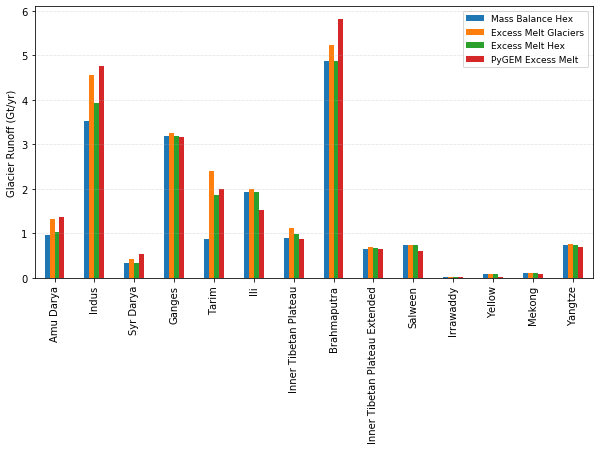

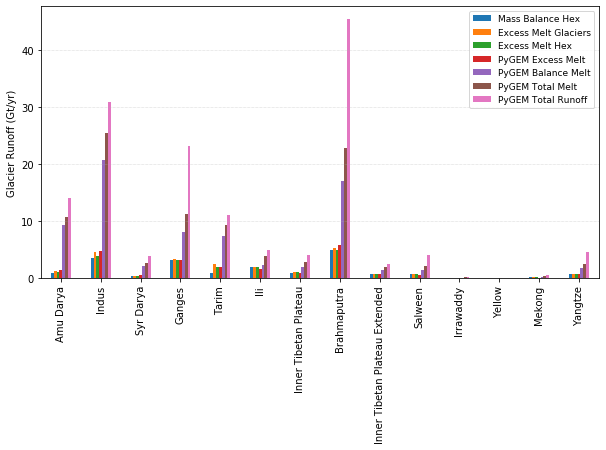

In [94]:
f,ax = plt.subplots(figsize=(10,5))
col_list = ['mb_Gta_sum_sum','meltwater_Gta_sum_sum','meltwater_Gta_hex_sum_sum','pygem_excess_meltwater_gta']
labels = ['Mass Balance Hex', 'Excess Melt Glaciers', 'Excess Melt Hex', 'PyGEM Excess Melt']
basin_df_merge[col_list].abs().plot.bar(ax=ax)
ax.set_ylabel('Glacier Runoff (Gt/yr)')
ax.legend(fontsize=9, labels=labels)
ax.grid(axis='y', lw=0.5, ls=':')
out_fn = '%s_%s.png' % (os.path.splitext(totalrunoff_csv_fn)[0], 'melt_comparison')
plt.savefig(out_fn, dpi=300, bbox_inches='tight', pad_inches=0.1)

f,ax = plt.subplots(figsize=(10,5))
col_list.extend(['pygem_balance_melt_gta','pygem_melt_gta','pygem_runoff_gta'])
labels.extend(['PyGEM Balance Melt', 'PyGEM Total Melt', 'PyGEM Total Runoff'])
basin_df_merge[col_list].abs().plot.bar(ax=ax)
ax.set_ylabel('Glacier Runoff (Gt/yr)')
ax.legend(fontsize=9, labels=labels)
ax.grid(axis='y', lw=0.5, ls=':')
out_fn = '%s_%s_all.png' % (os.path.splitext(totalrunoff_csv_fn)[0], 'melt_comparison')
plt.savefig(out_fn, dpi=300, bbox_inches='tight', pad_inches=0.1)

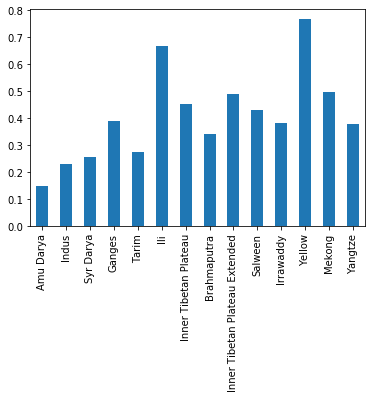

In [105]:
(basin_df_merge['pygem_excess_meltwater_gta']/basin_df_merge['pygem_balance_melt_gta']).plot.bar()

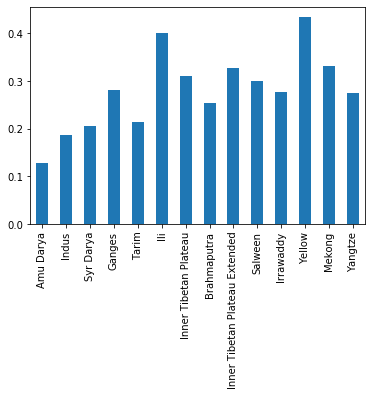

In [96]:
(basin_df_merge['pygem_excess_meltwater_gta']/basin_df_merge['pygem_melt_gta']).plot.bar()

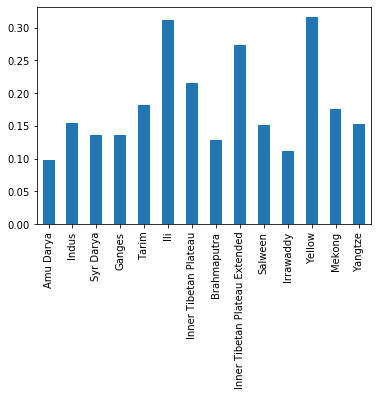

In [97]:
(basin_df_merge['pygem_excess_meltwater_gta']/basin_df_merge['pygem_runoff_gta']).plot.bar()

In [98]:
#pygem_col = 'pygem_runoff_gta'
#pygem_sigma_col = 'pygem_interannual_std_gta'
pygem_col = 'pygem_melt_gta'
#pygem_col = 'pygem_excess_meltwater_gta'
#pygem_col = 'pygem_balance_melt_gta'
#pygem_sigma_col = pygem_col.replace('_gta','_interannual_std_gta')

In [99]:
def get_perc(col=col, pygem_col=''):
    pygem_sigma_col = pygem_col.replace('_gta','_interannual_std_gta')
    basin_df_merge[col+'_'+pygem_col+'_perc'] = abs(100*basin_df_merge[col]/basin_df_merge[pygem_col])
    #This is scaled uncertainty for the chosen column (sigma is relative to totalrunoff)
    #basin_df_merge[pygem_sigma_col+'_scaled'] = (basin_df_merge[pygem_col]/basin_df_merge['pygem_runoff_gta']) * basin_df_merge[pygem_sigma_col]
    #basin_df_merge[col+'_'+pygem_col+'_perc_err'] = ((basin_df_merge[sigma_col]/basin_df_merge[col])**2 + \
    #                         (basin_df_merge[pygem_sigma_col+'_scaled']/basin_df_merge[pygem_col])**2)**0.5
    basin_df_merge[col+'_'+pygem_col+'_perc_err'] = ((basin_df_merge[sigma_col]/basin_df_merge[col])**2 + \
                             (basin_df_merge[pygem_sigma_col]/basin_df_merge[pygem_col])**2)**0.5
    basin_df_merge[col+'_'+pygem_col+'_perc_total_err'] = basin_df_merge[col+'_'+pygem_col+'_perc_err'] * basin_df_merge[col+'_'+pygem_col+'_perc']

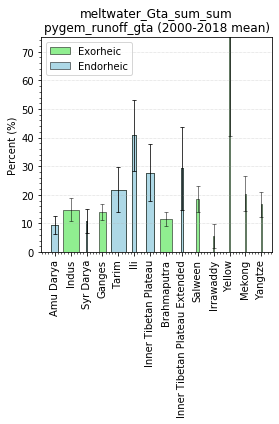

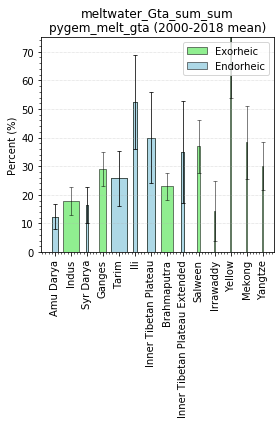

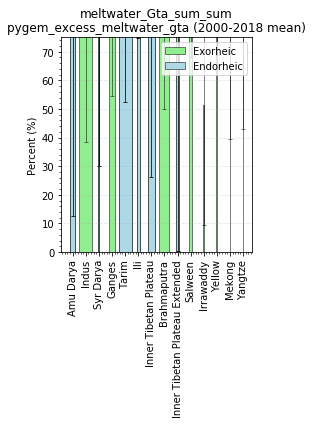

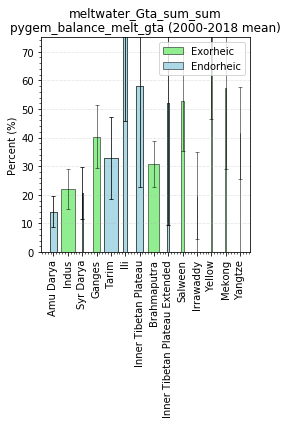

In [109]:
for i in ['pygem_runoff_gta','pygem_melt_gta','pygem_excess_meltwater_gta','pygem_balance_melt_gta']:
    get_perc(col, i)
    make_fig(col, i)